In [9]:
library(dplyr)

Warning message:
"package 'dplyr' was built under R version 3.6.2"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [1]:
# 결측치 <- NA        (주이! NAN은 없음.)
df <- data.frame(sex = c("M", "F", NA, "M", "F"),
                 score = c(5, 4, 3, 4, NA))
df

sex,score
M,5
F,4
NA,3
M,4
F,NA


In [2]:
is.na(df)

sex,score
FALSE,FALSE
FALSE,FALSE
TRUE,FALSE
FALSE,FALSE
FALSE,TRUE


In [3]:
table(is.na(df))


FALSE  TRUE 
    8     2 

In [4]:
table(is.na(df$sex)); table(is.na(df$score))


FALSE  TRUE 
    4     1 


FALSE  TRUE 
    4     1 

In [14]:
sum(df$sex); sum(df$score)

ERROR: Error in Summary.factor(structure(c(2L, 1L, NA, 2L, 1L), .Label = c("F", : 'sum' not meaningful for factors


[1] NA

In [12]:
df %>% filter(!is.na(sex))

sex,score
M,5
F,4
M,4
F,NA


In [ ]:
# 결측치 삭제 omit

In [13]:
# 그룹연산시 na.rm은 (결측치를 삭제한게 아닌 제외시켜만 놓은것. )
mean(df$score, na.rm= T); sum(df$score, na.rm= T)

[1] 4

[1] 16

## 결측치 대채하기
- 회귀 예측으로 채우는것도 방법중 하나., 또는 결측치를 채워주는 알고리즘도 있으니 찾아보자.
- 평균은 젤 할일 없을떄, 마지막에 쓰는거
- 물론 데이터 특성을 파악해야하는것.
- 카테고리성 데이터: 최빈값. / 연속형 데이터는 시리얼이니까 바로앞이나 바로 뒤의 값이 근사값

In [15]:
exam <- read.csv('./data/csv_exam.csv')
exam[c(3, 8, 15), "math"] <- NA             # 3, 8, 15행의 math에 NA 할당
mean(exam$math, na.rm=T)

[1] 55.23529

In [16]:
# 결측치 보기

table(is.na(exam$math))


FALSE  TRUE 
   17     3 

In [17]:
# 결측치를 평균으로 대체하기.
exam$math <- ifelse(is.na(exam$math), 55, exam$math)
table(is.na(exam$math))


FALSE 
   20 

In [18]:
mean(exam$math) # 평균에서 크게 벗어나진 않게 했었다.

[1] 55.2

## 혼자해보기
- 사전준비작업

In [19]:
mpg <- as.data.frame(ggplot2::mpg)           # mpg 데이터 불러오기
mpg[c(65, 124, 131, 153, 212), "hwy"] <- NA  # NA 할당하기

Q1. `drv`(구동방식)별로 `hwy`(고속도로 연비) 평균이 어떻게 다른지 알아보려고 합니다. 분석을 하기 전에 우선 두 변수에 결측치가 있는지 확인해야 합니다. `drv` 변수와 `hwy` 변수에 결측치가 몇 개 있는지 알아보세요.

In [20]:
table(is.na(mpg))


FALSE  TRUE 
 2569     5 

In [ ]:
table(is.na(mpg$drv))

In [ ]:
table(is.na(mpg$hwy))

Q2. `filter()`를 이용해 `hwy` 변수의 결측치를 제외하고, 어떤 구동방식의 `hwy` 평균이 높은지 알아보세요. 하나의 `dplyr` 구문으로 만들어야 합니다.

In [ ]:
library(dplyr)

In [21]:
str(mpg)

'data.frame':	234 obs. of  11 variables:
 $ manufacturer: chr  "audi" "audi" "audi" "audi" ...
 $ model       : chr  "a4" "a4" "a4" "a4" ...
 $ displ       : num  1.8 1.8 2 2 2.8 2.8 3.1 1.8 1.8 2 ...
 $ year        : int  1999 1999 2008 2008 1999 1999 2008 1999 1999 2008 ...
 $ cyl         : int  4 4 4 4 6 6 6 4 4 4 ...
 $ trans       : chr  "auto(l5)" "manual(m5)" "manual(m6)" "auto(av)" ...
 $ drv         : chr  "f" "f" "f" "f" ...
 $ cty         : int  18 21 20 21 16 18 18 18 16 20 ...
 $ hwy         : int  29 29 31 30 26 26 27 26 25 28 ...
 $ fl          : chr  "p" "p" "p" "p" ...
 $ class       : chr  "compact" "compact" "compact" "compact" ...


In [24]:
mpg %>% 
 filter( ifelse( is.na(mpg), na.omit(mpg), mpg ) ) %>% 
 summerise(mean_hwy = mean(hwy)) %>% 
 arrange(desc(mean_hwy))

ERROR: Error: Argument 2 filter condition does not evaluate to a logical vector


In [25]:
mpg %>%
  filter(!is.na(hwy)) %>%          # 결측치 제외
  group_by(drv) %>%                # drv별 분리
  summarise(mean_hwy = mean(hwy))  # hwy 평균 구하기

drv,mean_hwy
4,19.24242
f,28.20000
r,21.00000


# 이상치

In [26]:
outlier <- data.frame(sex = c(1, 2, 1, 3, 2, 1),
                      score = c(5, 4, 3, 4, 2, 6))
outlier

sex,score
1,5
2,4
1,3
3,4
2,2
1,6


In [ ]:
# 성별은 2개인데 3개가 나온점

# 1 ~ 5인것을 6이라는 이상치.

In [27]:
# 이상치 > 결측처리로 시키기.
# 성별
outlier$sex <- ifelse(outlier$sex == 3, NA, outlier$sex)
outlier

sex,score
1,5
2,4
1,3
NA,4
2,2
1,6


In [28]:
# score의 NA 넣기.
outlier$score <- ifelse(outlier$score > 5, NA, outlier$score)
outlier

sex,score
1,5
2,4
1,3
NA,4
2,2
1,NA


[,1]
[1,]   12
[2,]   18
[3,]   25
[4,]   27
[5,]   37
attr(,"class")
        1 
"integer"

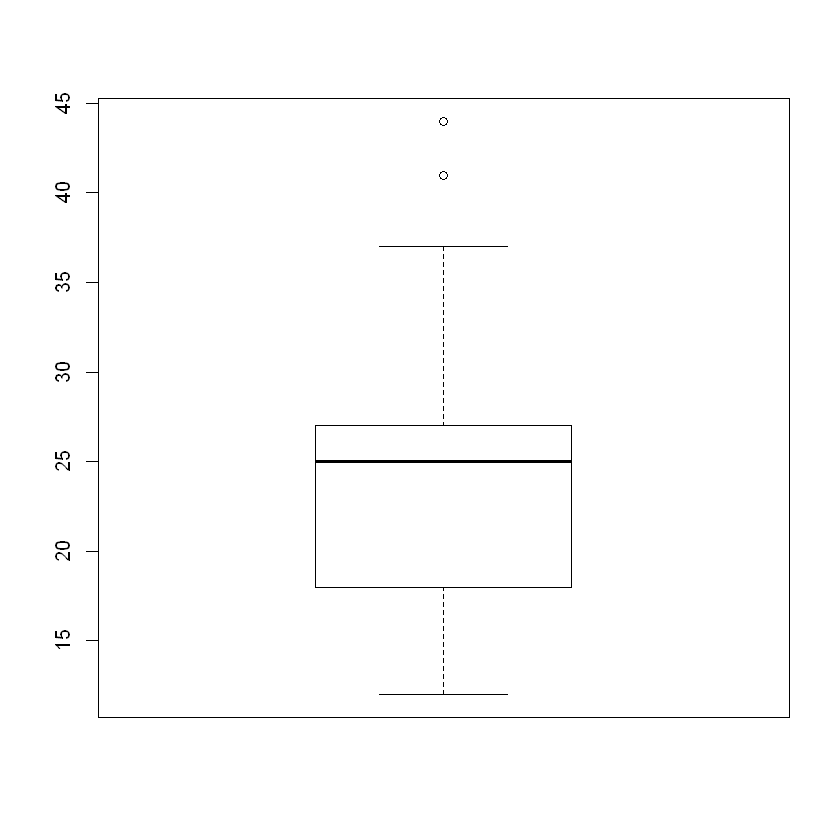

In [30]:
boxplot(mpg$hwy)$stats
# 이상치 경계 최밑단 | ㅠ박스 최하 | 중앙값 | 박스 최상단 | 이상치 경계 최상단
# 12   18 25 27 37

## 혼자해보기

In [31]:
mpg <- as.data.frame(ggplot2::mpg)                  # mpg 데이터 불러오기
mpg[c(10, 14, 58, 93), "drv"] <- "k"                # drv 이상치 할당
mpg[c(29, 43, 129, 203), "cty"] <- c(3, 4, 39, 42)  # cty 이상치 할당

In [33]:
table(is.na(mpg$drv))


FALSE 
  234 

In [35]:
table(mpg$drv)


  4   f   k   r 
100 106   4  24 

In [ ]:
# 4,r, f
mpg$drv <- ifelse(mpg$drv %in% c("4", "f" , "r"), mpg$drv, NA)

9
14
17
19
26


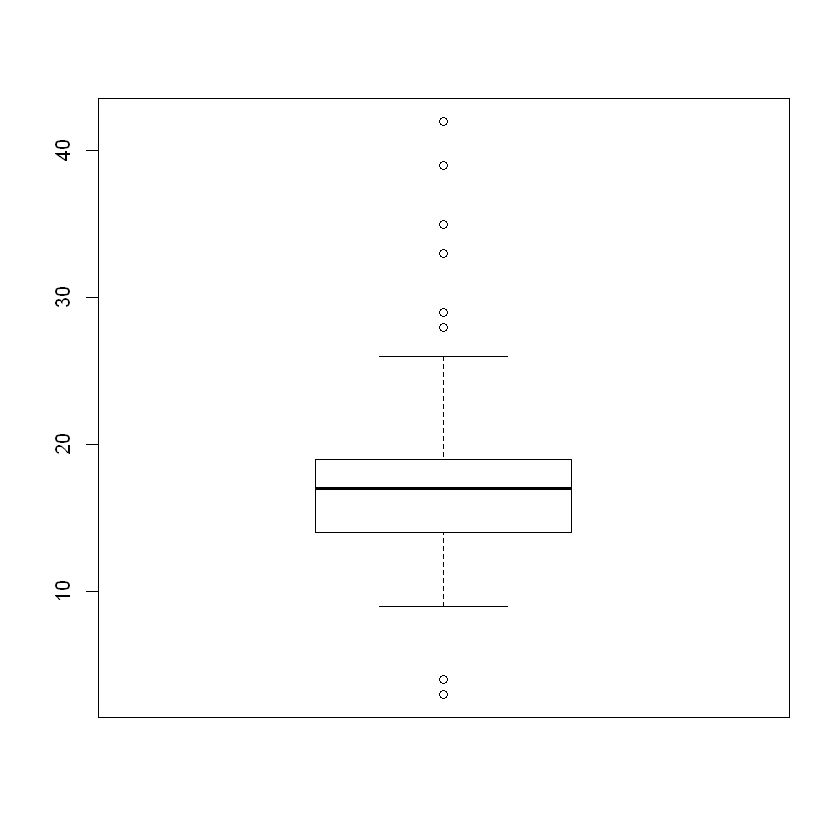

In [34]:
boxplot(mpg$cty)$stats